<h2> Mini-projet: Méthodes numériques avancées </h2>
<hr>
<h1>Sujet: Pricing des options via différents modèles discrets et continus</h1>
<hr>

Réalisé par:
* Bel Hadj Slimen Nada
* Faydi Mariem
* Smari Mariem
* Achour Salma
* Classe: **5DS2**/**Groupe 1**

# Outils

In [31]:
install.packages("fOptions")
library(fOptions)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Contenu:
* [Modélisation numérique du modèle Cox Ross Rubinstein](#1)
    * [Implémentation à l'aide du package "fOptions"](#1.1)
        * [Call Américain](#1.1.1)
        * [Put Américain](#1.1.1)
        * [Call Européen](#1.1.1)
        * [Put Européen](#1.1.1)
    * [Implémentation du modèle de Cox-Ross-Rubinstein from scratch](#1.2)
* [Modélisation numérique du modèle de Black & Scholes](#2)
    * [Cas d'une option européenne sans dividende](#2.1)
    * [Cas d'une option européenne avec dividende](#2.2)
* [Convergance du modèle de CRR vers le modèle de B&S](#3)
    * [Convergance d'un Call Américain](#3.1)
    * [Convergance d'un Put Américain](#3.2)
    * [Convergance d'un Call Européen](#3.3)
    * [Convergance d'un Put Européen](#3.4)

## Modélisation numérique du modèle Cox Ross Rubinstein.<a class="anchor" id="1"></a>

## Implémentation à l'aide du package "fOptions"<a class="anchor" id="1.1"></a>

###  Call Américain <a class="anchor" id="1.1.1"></a>

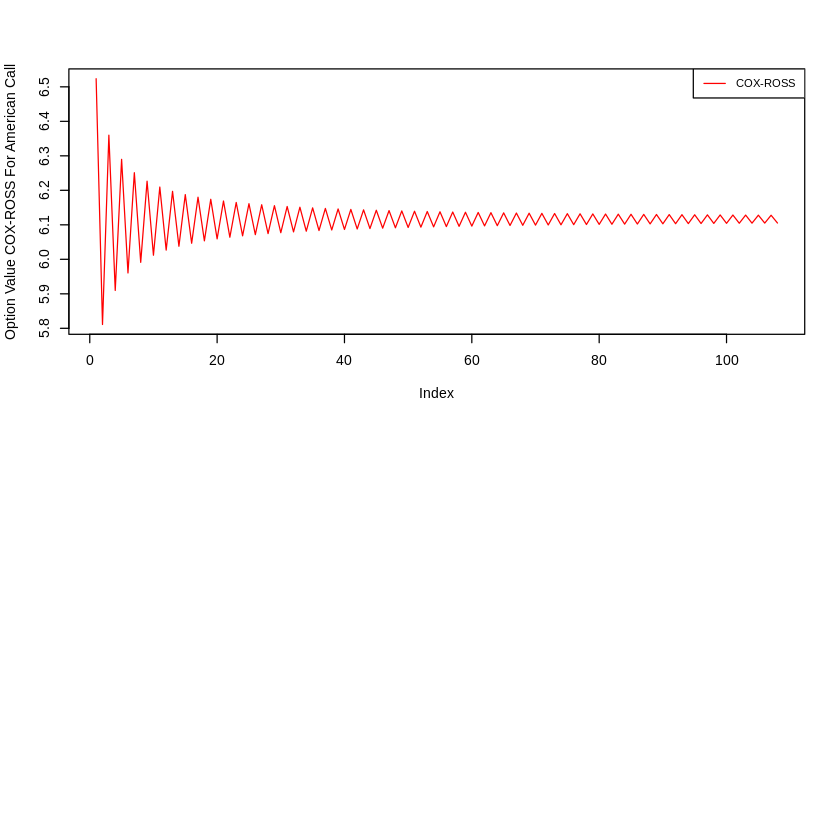

In [32]:
par(mfrow = c(2, 1), cex = 0.7)
   steps = 110
   CRROptionValue  = rep(NA, times = steps)
   for (n in 3:steps) { 
     CRROptionValue[n] = CRRBinomialTreeOption(TypeFlag = "ca", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
    
   }           
   plot(CRROptionValue[3:steps], type = "l", col = "red", ylab = "Option Value COX-ROSS For American Call" )
legend("topright" ,legend=c("COX-ROSS "),col=c("red"), lty=1:2, cex=0.8)

In [33]:
CRRBinomialTreeOption(TypeFlag = "ca", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)


Title:
 CRR Binomial Tree Option 

Call:
 CRRBinomialTreeOption(TypeFlag = "ca", S = 50, X = 50, Time = 0.4167, 
     r = 0.1, b = 0.1, sigma = 0.4, n = n)

Parameters:
          Value:
 TypeFlag ca    
 S        50    
 X        50    
 Time     0.4167
 r        0.1   
 b        0.1   
 sigma    0.4   
 n        110   

Option Price:
 6.105224 

Description:
 Sun Dec  6 09:30:30 2020 


* Arbre binomial d'un **Call Américain** (N=5)

In [34]:
CRRBinomialTreeOption(TypeFlag = "ca", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = 5)


Title:
 CRR Binomial Tree Option 

Call:
 CRRBinomialTreeOption(TypeFlag = "ca", S = 50, X = 50, Time = 0.4167, 
     r = 0.1, b = 0.1, sigma = 0.4, n = 5)

Parameters:
          Value:
 TypeFlag ca    
 S        50    
 X        50    
 Time     0.4167
 r        0.1   
 b        0.1   
 sigma    0.4   
 n        5     

Option Price:
 6.359834 

Description:
 Sun Dec  6 09:30:30 2020 


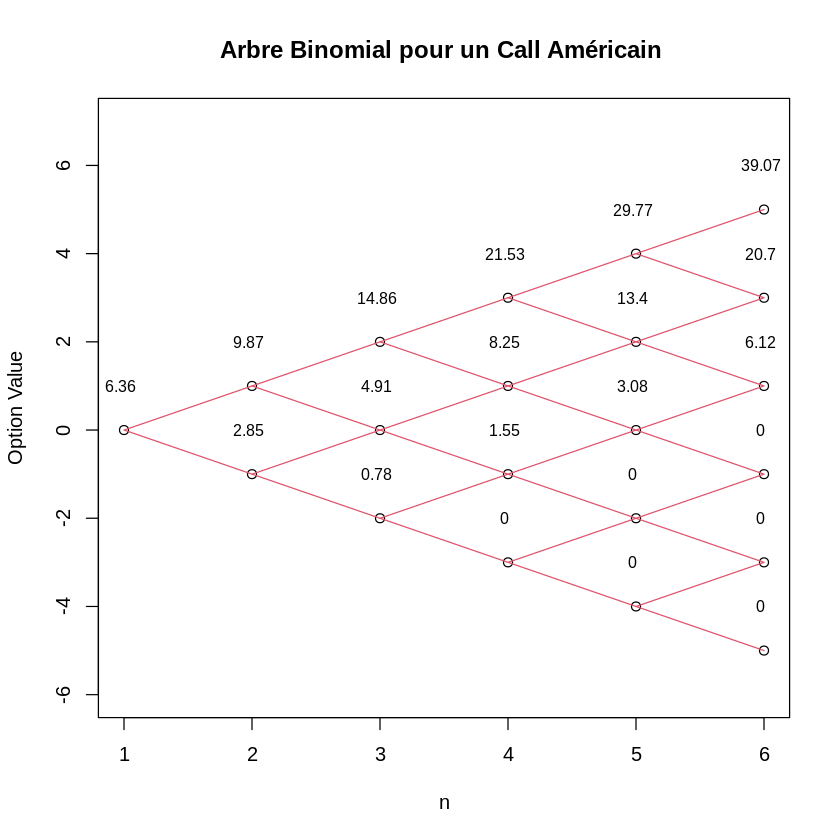

In [35]:
CRRTree = BinomialTreeOption(TypeFlag = "ca", S = 50, X = 50, 
     Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = 5)
   BinomialTreePlot(CRRTree, dy = 1, cex = 0.8, ylim = c(-6, 7),
     xlab = "n", ylab = "Option Value")
   title(main = "Arbre Binomial pour un Call Américain ") 

### Put Américain <a class="anchor" id="1.1.2"></a>

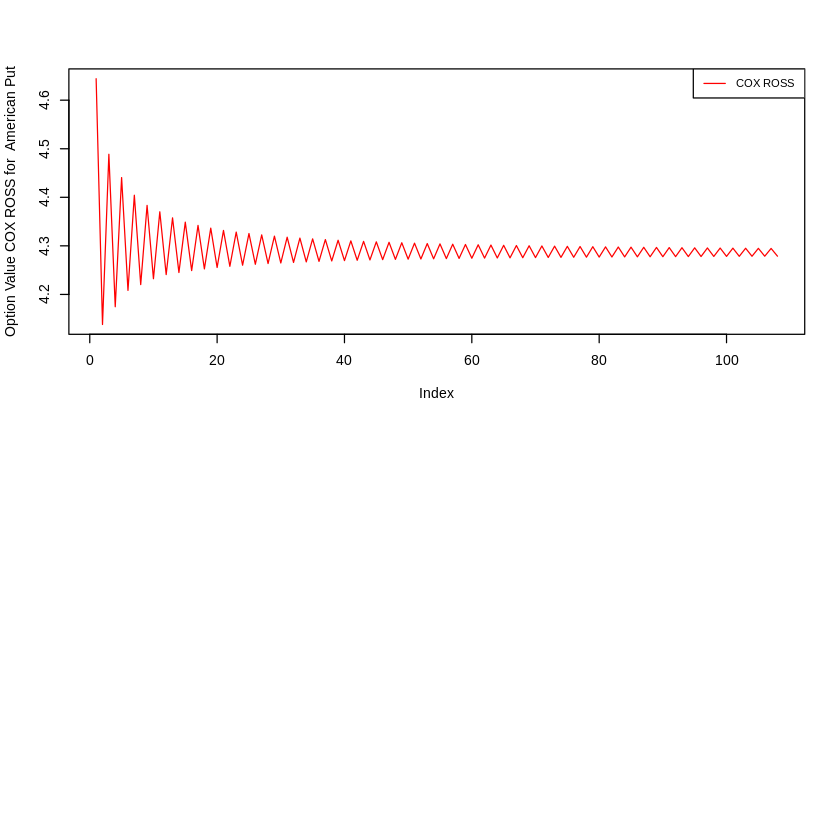

In [36]:
par(mfrow = c(2, 1), cex = 0.7)
   steps = 110
   CRROptionValue_p  = rep(NA, times = steps)
   for (n in 3:steps) { 
     CRROptionValue_p[n] = CRRBinomialTreeOption(TypeFlag = "pa", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
    
   }           
   plot(CRROptionValue_p[3:steps], type = "l", col = "red", ylab = "Option Value COX ROSS for  American Put")
legend("topright", legend=c("COX ROSS "),col=c("red"), lty=1:2, cex=0.8)


In [37]:
CRRBinomialTreeOption(TypeFlag = "pa", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)


Title:
 CRR Binomial Tree Option 

Call:
 CRRBinomialTreeOption(TypeFlag = "pa", S = 50, X = 50, Time = 0.4167, 
     r = 0.1, b = 0.1, sigma = 0.4, n = n)

Parameters:
          Value:
 TypeFlag pa    
 S        50    
 X        50    
 Time     0.4167
 r        0.1   
 b        0.1   
 sigma    0.4   
 n        110   

Option Price:
 4.278776 

Description:
 Sun Dec  6 09:30:30 2020 


* Arbre binomial d'un **Put Américain** (N=5)

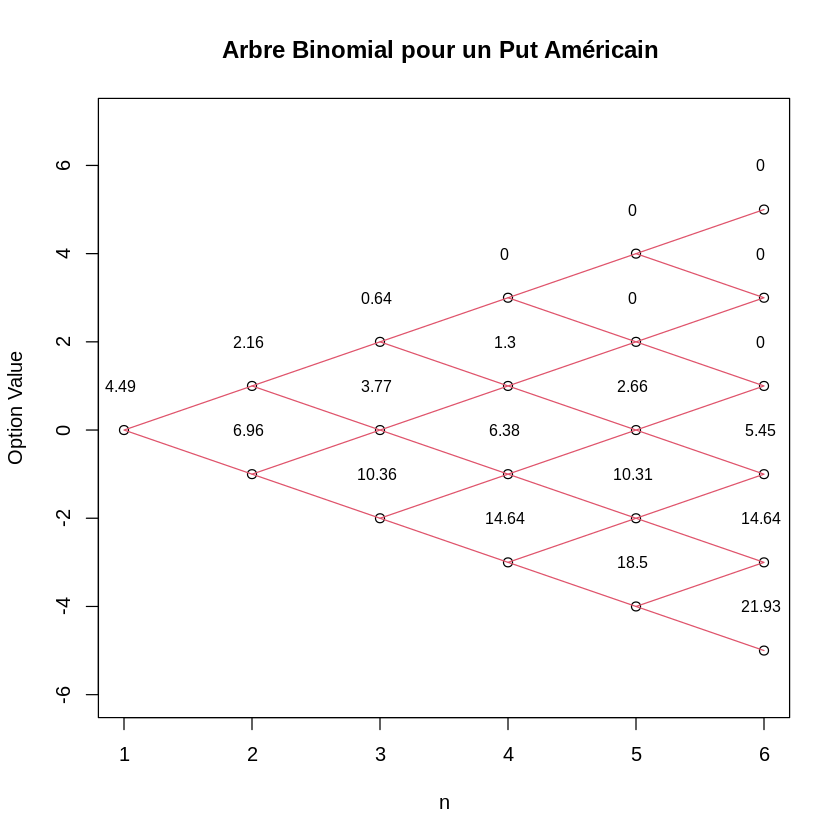

In [38]:
CRRTree = BinomialTreeOption(TypeFlag = "pa", S = 50, X = 50, 
     Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = 5)
   BinomialTreePlot(CRRTree, dy = 1, cex = 0.8, ylim = c(-6, 7),
     xlab = "n", ylab = "Option Value")
   title(main = "Arbre Binomial pour un Put Américain ") 

### Call Européen <a class="anchor" id="1.1.3"></a>

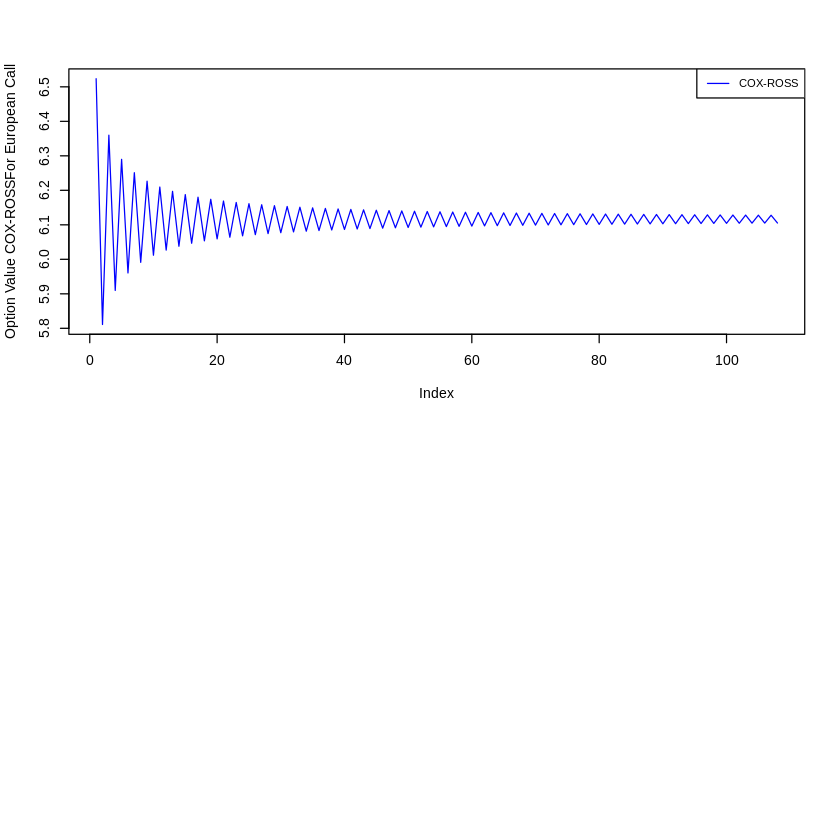

In [39]:
par(mfrow = c(2, 1), cex = 0.7)
   steps = 110
   CRROptionValue  = rep(NA, times = steps)
   for (n in 3:steps) { 
     CRROptionValue[n] = CRRBinomialTreeOption(TypeFlag = "ce", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
    
   }           
   plot(CRROptionValue[3:steps], type = "l", col = "Blue", ylab = "Option Value COX-ROSSFor European Call")
legend("topright", legend=c("COX-ROSS"),col=c("Blue"), lty=1:2, cex=0.8)


In [40]:
CRRBinomialTreeOption(TypeFlag = "ce", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)


Title:
 CRR Binomial Tree Option 

Call:
 CRRBinomialTreeOption(TypeFlag = "ce", S = 50, X = 50, Time = 0.4167, 
     r = 0.1, b = 0.1, sigma = 0.4, n = n)

Parameters:
          Value:
 TypeFlag ce    
 S        50    
 X        50    
 Time     0.4167
 r        0.1   
 b        0.1   
 sigma    0.4   
 n        110   

Option Price:
 6.105224 

Description:
 Sun Dec  6 09:30:31 2020 


* Arbre binomial d'un **Call Européen** (N=5)

In [41]:
CRRBinomialTreeOption(TypeFlag = "ce", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = 5)


Title:
 CRR Binomial Tree Option 

Call:
 CRRBinomialTreeOption(TypeFlag = "ce", S = 50, X = 50, Time = 0.4167, 
     r = 0.1, b = 0.1, sigma = 0.4, n = 5)

Parameters:
          Value:
 TypeFlag ce    
 S        50    
 X        50    
 Time     0.4167
 r        0.1   
 b        0.1   
 sigma    0.4   
 n        5     

Option Price:
 6.359834 

Description:
 Sun Dec  6 09:30:31 2020 


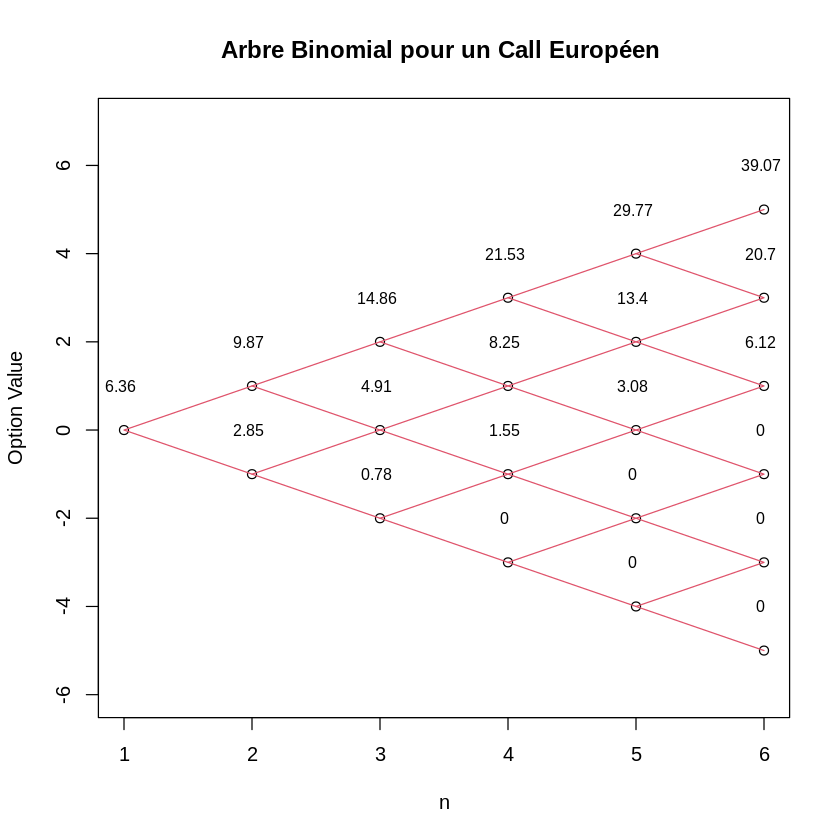

In [42]:
CRRTree = BinomialTreeOption(TypeFlag = "ce", S = 50, X = 50, 
     Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = 5)
   BinomialTreePlot(CRRTree, dy = 1, cex = 0.8, ylim = c(-6, 7),
     xlab = "n", ylab = "Option Value")
   title(main = "Arbre Binomial pour un Call Européen ") 

### Put Européen <a class="anchor" id="1.1.4"></a>

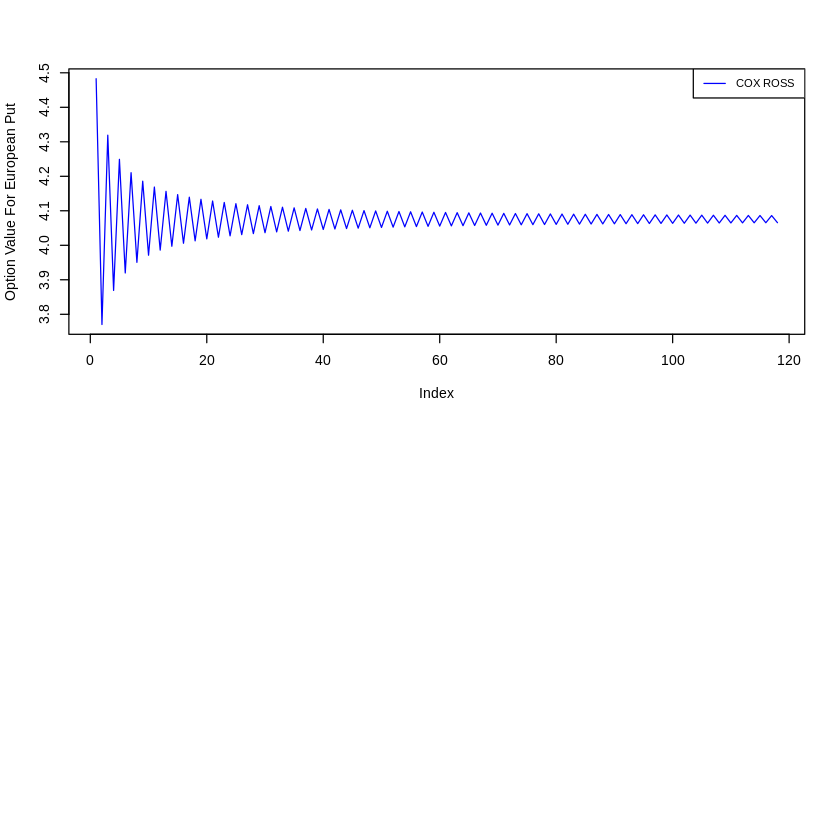

In [43]:
par(mfrow = c(2, 1), cex = 0.7)
   steps = 120
   CRROptionValue =  JROptionValue = TIANOptionValue =
     rep(NA, times = steps)
   for (n in 3:steps) {
     CRROptionValue[n] = CRRBinomialTreeOption(TypeFlag = "pe", S = 50,
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
   
   }          
    plot(CRROptionValue[3:steps], type = "l", col = "blue", ylab = "Option Value For European Put")
    legend("topright", legend=c("COX ROSS "),col=c("blue"), lty=1:2, cex=0.8)


In [44]:
CRRBinomialTreeOption(TypeFlag = "pe", S = 50, 
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)


Title:
 CRR Binomial Tree Option 

Call:
 CRRBinomialTreeOption(TypeFlag = "pe", S = 50, X = 50, Time = 0.4167, 
     r = 0.1, b = 0.1, sigma = 0.4, n = n)

Parameters:
          Value:
 TypeFlag pe    
 S        50    
 X        50    
 Time     0.4167
 r        0.1   
 b        0.1   
 sigma    0.4   
 n        120   

Option Price:
 4.0655 

Description:
 Sun Dec  6 09:30:31 2020 


* Arbre binomial d'un **Put Européen** (N=5)

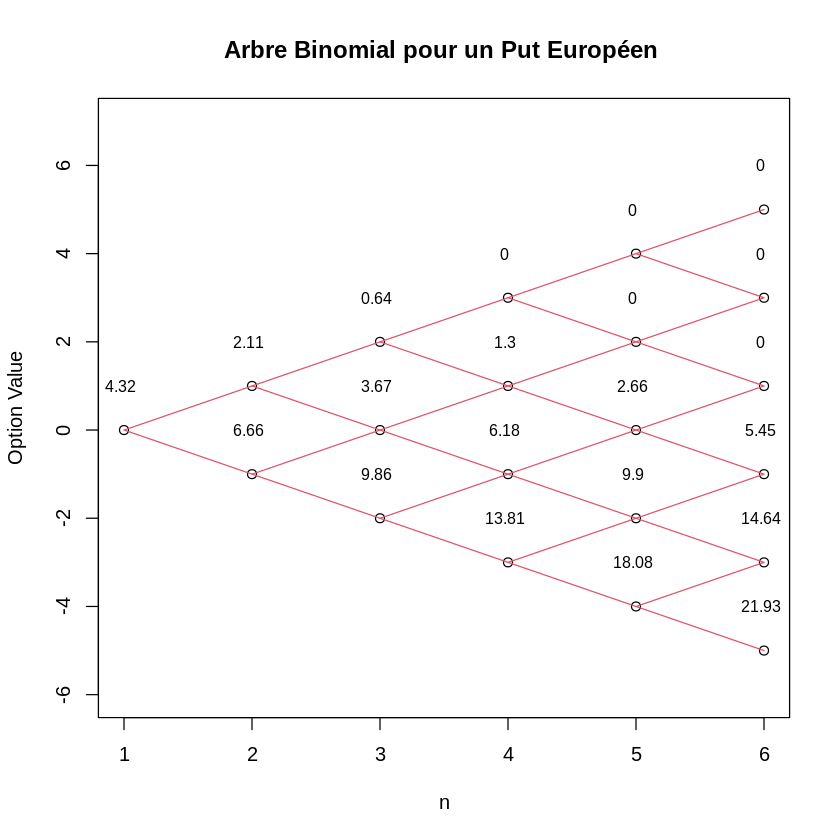

In [45]:
CRRTree = BinomialTreeOption(TypeFlag = "pe", S = 50, X = 50, 
     Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = 5)
   BinomialTreePlot(CRRTree, dy = 1, cex = 0.8, ylim = c(-6, 7),
     xlab = "n", ylab = "Option Value")
   title(main = "Arbre Binomial pour un Put Européen ") 

### Implémentation du modèle de Cox-Ross-Rubinstein from scratch <a class="anchor" id="1.2"></a>

In [88]:
CRR_Model = function(n,S,K,r,sigma,T,typeOption, PutOrCall){
    At = T/n
    u = exp(sigma*sqrt(At)) #up
    d = 1./u #down
    R = exp(r*At)
    p = (R-d) / (u-d) #probabilité risque neutre
    q = 1-p
    
    prix_sj = matrix(0, nrow = n+1, ncol = n+1)
    prix_sj[1,1] = S
    for (i in 2:(n+1)){
        prix_sj[i,1] = prix_sj[i-1,1]*u
        for (j in 2:i){
            prix_sj[i,j] = prix_sj[i-1,j-1]*d
        }
    }
    prix_option = matrix(0, nrow = n+1, ncol = n+1)
    for (j in 1:(n+1)){
        if(PutOrCall=="C"){
            prix_option[n+1,j] = max(0, prix_sj[n+1,j]-K)
        }else if(PutOrCall=="P"){
            prix_option[n+1,j] = max(0, K-prix_sj[n+1,j])
        }
    }
    
    if (typeOption == "E"){
        for (i in seq(n,1,-1)){
            for (j in 1:i){
                prix_option[i,j] = max(0,1/R*(p*prix_option[i+1,j] + q*prix_option[i+1,j+1]))
            }
        }
    }else if (typeOption == "A"){
        for(i in seq(n,1,-1)){
            for (j in 1:i){
                if (PutOrCall=="P"){
                     prix_option[i,j] = max(0, K-prix_sj[i,j], 1/R*(p*prix_option[i+1,j]+q*prix_option[i+1,j+1]))
                }else if (PutOrCall=="C"){
                    prix_option[i,j] = max(0, prix_sj[i,j]-K, 1/R*(p*prix_option[i+1,j]+q*prix_option[i+1,j+1]))
                }
            }
        }
    }
    return (prix_option[1,1])
    
    
 }

In [47]:
print("Cas d'un call Européen d'horizon N=5:")
print(CRR_Model(n=5,S=50,K=50,r=0.1,sigma=0.4,T=0.4167,typeOption="E", PutOrCall="C"))
print("----------------------------------------")
print("Cas d'un put Européen d'horizon N=5:")
print(CRR_Model(n=5,S=50,K=50,r=0.1,sigma=0.4,T=0.4167,typeOption="E", PutOrCall="P"))
print("----------------------------------------")
print("Cas d'un call Américain d'horizon N=5:")
print(CRR_Model(n=5,S=50,K=50,r=0.1,sigma=0.4,T=0.4167,typeOption="A", PutOrCall="C"))
print("----------------------------------------")
print("Cas d'un put Américain d'horizon N=5:")
print(CRR_Model(n=5,S=50,K=50,r=0.1,sigma=0.4,T=0.4167,typeOption="A", PutOrCall="P"))
print("----------------------------------------")

[1] "Cas d'un call Européen d'horizon N=5:"
[1] 6.359834
[1] "----------------------------------------"
[1] "Cas d'un put Européen d'horizon N=5:"
[1] 4.319147
[1] "----------------------------------------"
[1] "Cas d'un call Américain d'horizon N=5:"
[1] 6.359834
[1] "----------------------------------------"
[1] "Cas d'un put Américain d'horizon N=5:"
[1] 4.488599
[1] "----------------------------------------"


## Modélisation numérique du modèle de Black & Scholes <a class="anchor" id="2"></a>

### Option Européenne sans dividende <a class="anchor" id="2.1"></a>

In [48]:
BlackScholes <- function(S, K, r, T, sig, type){
  
  if(type=="C"){
  d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
  d2 <- d1 - sig*sqrt(T)
  
  value <- S*pnorm(d1) - K*exp(-r*T)*pnorm(d2)
  return(value)}
  
  if(type=="P"){
  d1 <- (log(S/K) + (r + sig^2/2)*T) / (sig*sqrt(T))
  d2 <- d1 - sig*sqrt(T)
  
  value <-  (K*exp(-r*T)*pnorm(-d2) - S*pnorm(-d1))
  return(value)}
}

* Cas d'un Call

In [49]:
BS_call=BlackScholes(50,50,0.1,0.4167,0.4,"C")
BS_call

[1] 6.116788

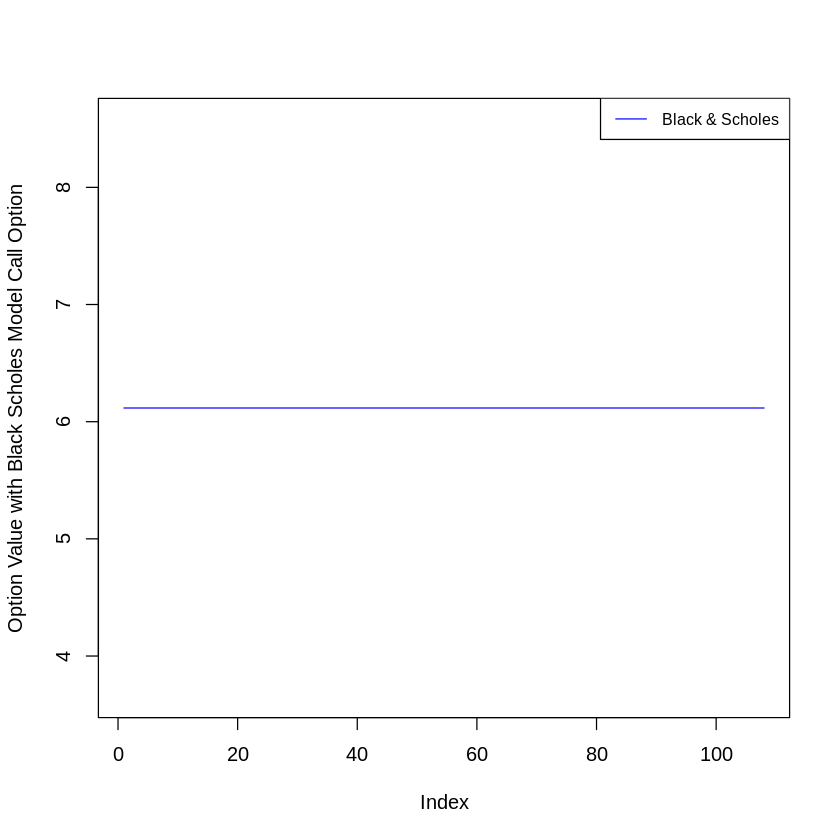

In [50]:
steps = 110
   BSOptionValue  = rep(NA, times = steps)
   for (n in 3:steps) { 
     BSOptionValue[n] = BlackScholes(50,50,0.1,0.4167,0.4,"C")
    
   } 
plot(BSOptionValue[3:steps],type = "l",ylab = "Option Value with Black Scholes Model Call Option",
     col="Blue")
legend("topright", legend=c("Black & Scholes"),col=c("blue"), lty=1:2, cex=0.8)


* Cas d'un Put

In [51]:
BS_put=BlackScholes(50,50,0.1,0.4167,0.4,"P")
BS_put

[1] 4.076101

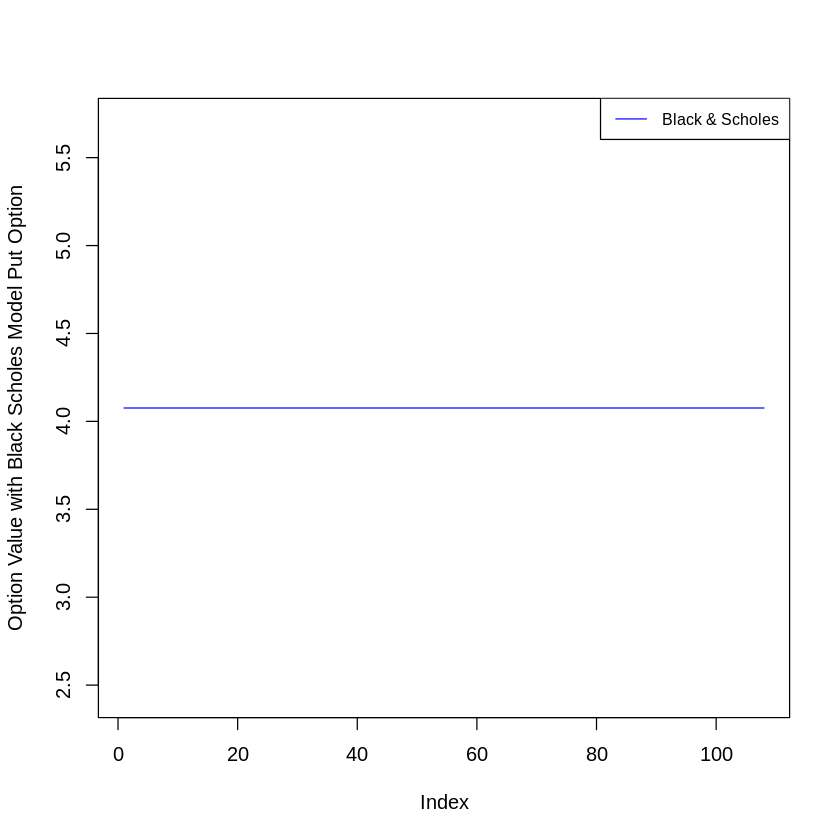

In [52]:
steps = 110
   BSOptionValue  = rep(NA, times = steps)
   for (n in 3:steps) { 
     BSOptionValue[n] = BlackScholes(50,50,0.1,0.4167,0.4,"P")
    
   } 
plot(BSOptionValue[3:steps],type = "l",ylab = "Option Value with Black Scholes Model Put Option", col="Blue")
legend("topright", legend=c("Black & Scholes"),col=c("blue"), lty=1:2, cex=0.8)

### Option Européenne avec dividende <a class="anchor" id="2.2"></a>

In [53]:
BlackScholesDiv <- function(S, K, r, T, sig, type,q){
  
  d1 <- (log(S/K) + (r - q + sig^2/2)*T) / (sig*sqrt(T))
  d2 <- d1 - sig*sqrt(T)
  
  if(type=="C"){

  value <- (S*exp(-q * T)*pnorm(d1) - K*exp(-r * T) * pnorm(d2))
  return(value)}
  
  if(type=="P"){
  value <-  (K*exp(-r * T)*pnorm(-d2) - S*exp(-q * T)*pnorm(-d1))
  return(value)}
}

In [54]:
q = 0.0205 #dividende

* Cas d'un Call

In [55]:
call_div = BlackScholesDiv(S=50, K=50, r=0.1, T=0.4167, sig=0.4, type="C",q=0.0205)
print(call_div)

[1] 5.858232


* Cas d'un Put

In [56]:
put_div=BlackScholesDiv(S=50, K=50, r=0.1, T=0.4167, sig=0.4, type="P",q=0.0205)
print(put_div)

[1] 4.242843


# Convergance du modèle de CRR vers le modèle de B&S <a class="anchor" id="3"></a>

### Convergence d'un Call Américain <a class="anchor" id="3.1"></a>

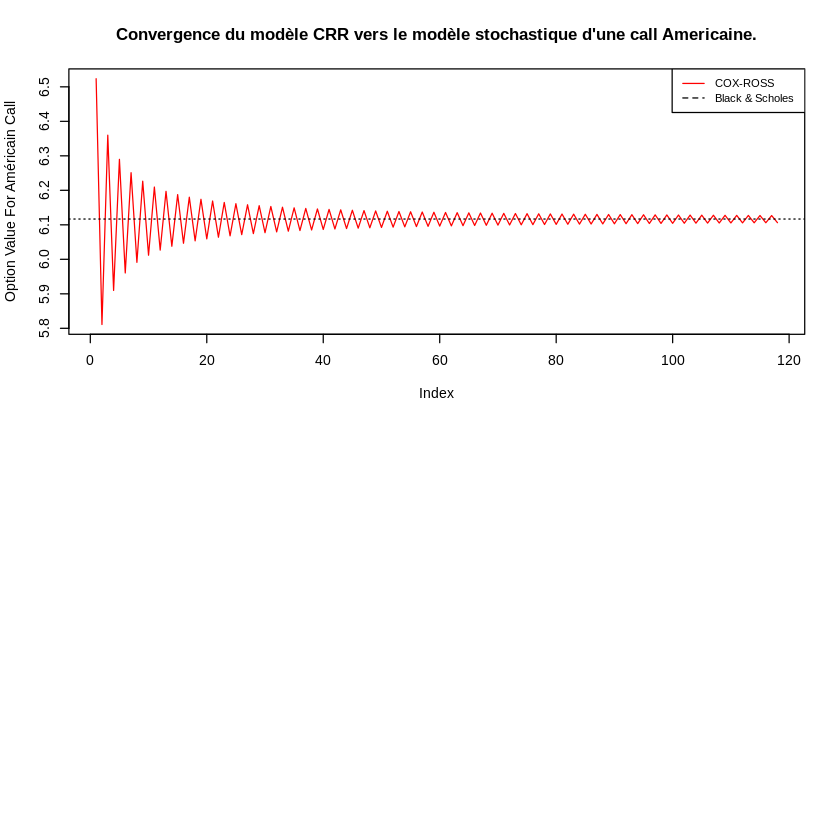

In [57]:
par(mfrow = c(2, 1), cex = 0.7)
steps = 120
CRROptionValue =  JROptionValue = TIANOptionValue = rep(NA, times = steps)
for(n in 3:steps) {
     CRROptionValue[n] = CRRBinomialTreeOption(TypeFlag = "ca", S = 50,
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
   
   }          
plot(CRROptionValue[3:steps], type = "l", col = "red", ylab = "Option Value For Américain Call")

   # Add Result from BAW Approximation:
BAWValue =  BAWAmericanApproxOption(TypeFlag = "c", S = 50, X = 50,
Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4)@price
abline(h = BAWValue, lty = 3)
title(main = "Convergence du modèle CRR vers le modèle stochastique d'une call Americaine.")


legend("topright", legend=c("COX-ROSS ","Black & Scholes"),col=c("red","black"), lty=1:2, cex=0.8)
   


### Convergence d'un Put Américain  <a class="anchor" id="3.2"></a>

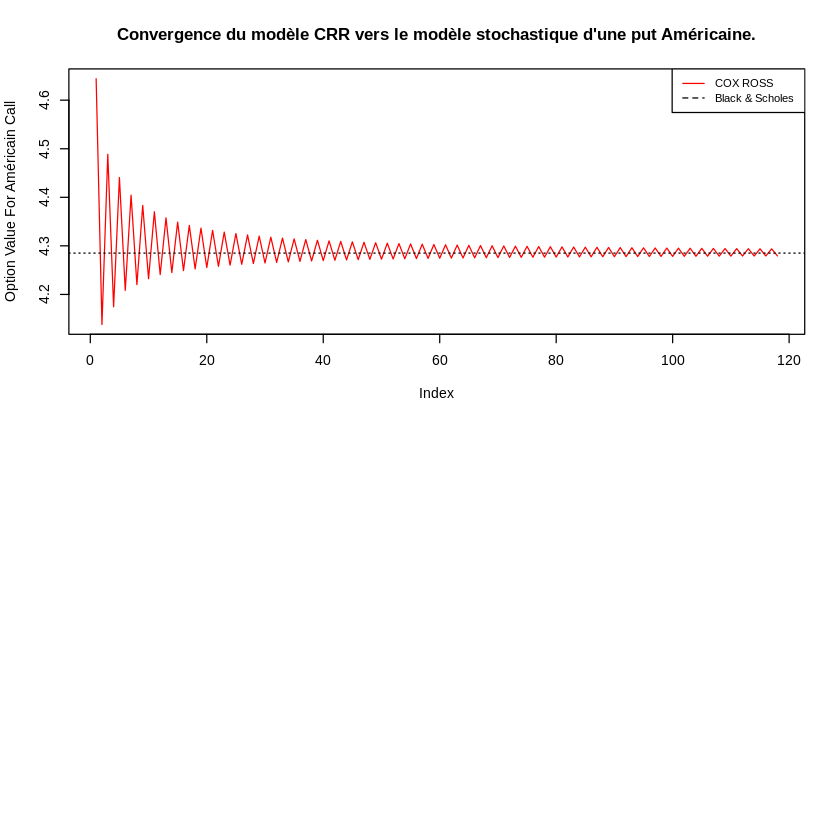

In [58]:
par(mfrow = c(2, 1), cex = 0.7)
   steps = 120
   CRROptionValue =  JROptionValue = TIANOptionValue =
     rep(NA, times = steps)
   for (n in 3:steps) {
     CRROptionValue[n] = CRRBinomialTreeOption(TypeFlag = "pa", S = 50,
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
   
   }          
    plot(CRROptionValue[3:steps], type = "l", col = "red", ylab = "Option Value For Américain Call")
    legend("topright", legend=c("COX ROSS ","Black & Scholes"),col=c("red","black"), lty=1:2, cex=0.8)

   # Add Result from BAW Approximation:
   BAWValue =  BAWAmericanApproxOption(TypeFlag = "p", S = 50, X = 50,
     Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4)@price
   abline(h = BAWValue, lty = 3)
   title(main = "Convergence du modèle CRR vers le modèle stochastique d'une put Américaine.")


### Convergence d'un call Européen <a class="anchor" id="3.3"></a>

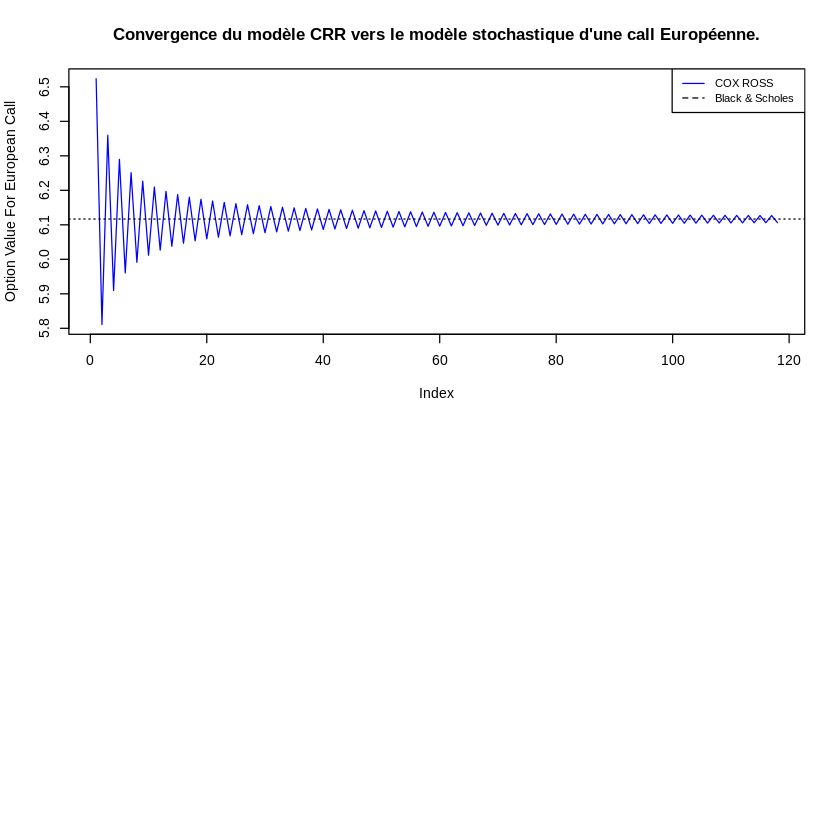

In [59]:
par(mfrow = c(2, 1), cex = 0.7)
   steps = 120
   CRROptionValue =  JROptionValue = TIANOptionValue =
     rep(NA, times = steps)
   for (n in 3:steps) {
     CRROptionValue[n] = CRRBinomialTreeOption(TypeFlag = "ce", S = 50,
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
   
   }          
    plot(CRROptionValue[3:steps], type = "l", col = "Blue", ylab = "Option Value For European Call")
legend("topright", legend=c("COX ROSS ","Black & Scholes"),col=c("Blue","black"), lty=1:2, cex=0.8)

   # Add Result from BAW Approximation:
   BAWValue =  BAWAmericanApproxOption(TypeFlag = "c", S = 50, X = 50,
     Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4)@price
   abline(h = BAWValue, lty = 3)
   title(main = "Convergence du modèle CRR vers le modèle stochastique d'une call Européenne.")

   



### Convergence Put Européen <a class="anchor" id="3.4"></a>

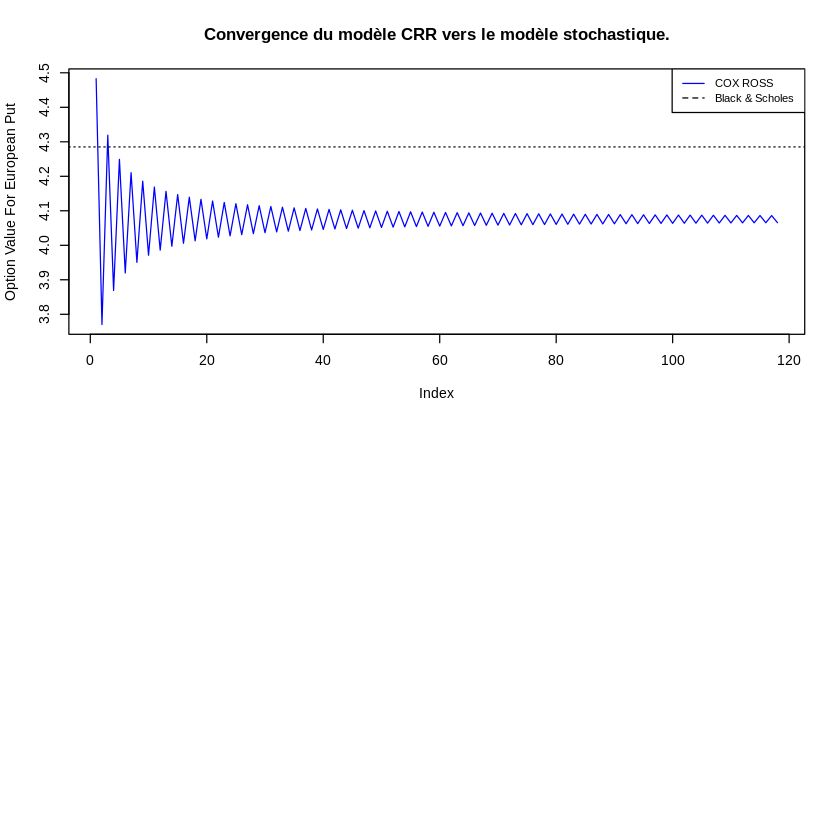

In [60]:
par(mfrow = c(2, 1), cex = 0.7)
   steps = 120
   CRROptionValue =  JROptionValue = TIANOptionValue =
     rep(NA, times = steps)
   for (n in 3:steps) {
     CRROptionValue[n] = CRRBinomialTreeOption(TypeFlag = "pe", S = 50,
       X = 50, Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4, n = n)@price
   
   }          
    plot(CRROptionValue[3:steps], type = "l", col = "blue", ylab = "Option Value For European Put")
legend("topright", legend=c("COX ROSS ","Black & Scholes"),col=c("blue","black"), lty=1:2, cex=0.8)

   # Add Result from BAW Approximation:
   BAWValue =  BAWAmericanApproxOption(TypeFlag = "p", S = 50, X = 50,
     Time = 0.4167, r = 0.1, b = 0.1, sigma = 0.4)@price
   abline(h = BAWValue, lty = 3)
   title(main = "Convergence du modèle CRR vers le modèle stochastique.")


### Correction

In [91]:
CRR_Model_corr = function(n,S,K,r,sigma,T,typeOption, PutOrCall){
    At = T/n
    u = exp(sigma*sqrt(At)+1/n*log(K/S)) #up
    d = 1./u #down
    R = exp(r*At)
    p = (R-d) / (u-d) #probabilité risque neutre
    q = 1-p
    
    prix_sj = matrix(0, nrow = n+1, ncol = n+1)
    prix_sj[1,1] = S
    for (i in 2:(n+1)){
        prix_sj[i,1] = prix_sj[i-1,1]*u
        for (j in 2:i){
            prix_sj[i,j] = prix_sj[i-1,j-1]*d
        }
    }
    prix_option = matrix(0, nrow = n+1, ncol = n+1)
    for (j in 1:(n+1)){
        if(PutOrCall=="C"){
            prix_option[n+1,j] = max(0, prix_sj[n+1,j]-K)
        }else if(PutOrCall=="P"){
            prix_option[n+1,j] = max(0, K-prix_sj[n+1,j])
        }
    }
    
    if (typeOption == "E"){
        for (i in seq(n,1,-1)){
            for (j in 1:i){
                prix_option[i,j] = max(0,1/R*(p*prix_option[i+1,j] + q*prix_option[i+1,j+1]))
            }
        }
    }else if (typeOption == "A"){
        for(i in seq(n,1,-1)){
            for (j in 1:i){
                if (PutOrCall=="P"){
                     prix_option[i,j] = max(0, K-prix_sj[i,j], 1/R*(p*prix_option[i+1,j]+q*prix_option[i+1,j+1]))
                }else if (PutOrCall=="C"){
                    prix_option[i,j] = max(0, prix_sj[i,j]-K, 1/R*(p*prix_option[i+1,j]+q*prix_option[i+1,j+1]))
                }
            }
        }
    }
    return (prix_option[1,1])
    
    
 }

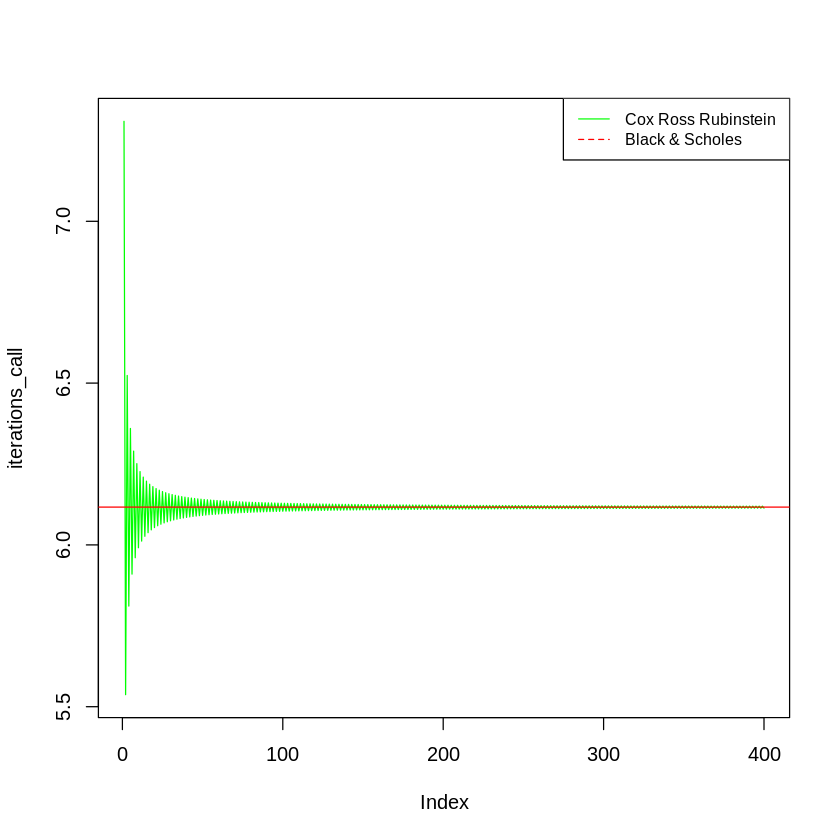

In [93]:
iterations_call = rep(NA,400)
for (n in 1:400){
iterations_call[n] = CRR_Model_corr(n=n,S=50,K=50,r=0.1,sigma=0.4,T=0.4167,typeOption="E", PutOrCall="C")
}
plot(iterations_call, type="l", col="green")
abline(h=BlackScholes(50,50,0.1,0.4167,0.4,"C"), col="red")
legend("topright", legend=c("Cox Ross Rubinstein", "Black & Scholes"),
       col=c("green", "red"), lty=1:2, cex=0.8)